### Import libraries


In [13]:
import pandas as pd 
import os 
from glob import glob 

### merging 12 files into one file 

In [14]:

stock_files = sorted(glob('D:\Data analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_*.csv'))
stock_files

['D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_1.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_10.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_11.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_12.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_2.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_3.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_4.csv',
 'D:\\Data analysis\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master

### Read in updated dataframe

In [43]:
all_data =pd.concat((pd.read_csv(file).assign(filename = file)
                for file in stock_files), ignore_index = True)
files = [file for file in os.listdir('D:\Data analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data') if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()
all_months_data.to_csv("all_data_copy.csv", index=False)

### Drop rows of NAN

In [45]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...


##### Get rid of text in order date column

In [65]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


##### Make columns correct type

In [68]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1


##### Add month column

In [66]:
all_data['Month'] =all_data['Order Date'].str[0:2]
all_data= all_data.dropna(subset=['Order Date'])
all_data['Month'] =all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1


#### Add city column

In [83]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{ get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,11.99,Austin (TX)


# Data Exploration! 

### Question 1: What was the best month for sales? How much was earned that month?

In [70]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,11.99


In [73]:
results = all_data.groupby('Month').sum()

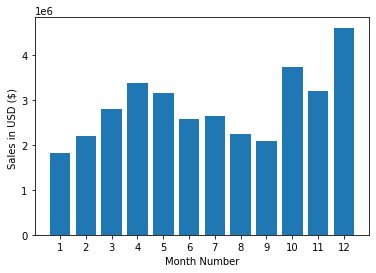

In [77]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($) ')
plt.xlabel('Month Number')
plt.show()



### Question 2: What city sold the most product?

In [84]:
results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


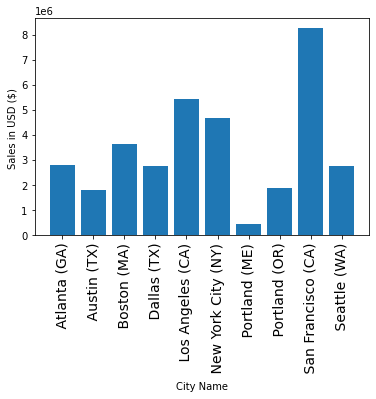

In [92]:
import matplotlib.pyplot as plt

Cities=[City for City , df in all_data.groupby('City')]

plt.bar(Cities,results['Sales'])
plt.xticks(Cities, rotation= 'vertical', size = 14)
plt.ylabel('Sales in USD ($) ')
plt.xlabel('City Name')
plt.show()

In [93]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,11.99,Austin (TX)


### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [94]:
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])

In [95]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,11.99,Austin (TX)


In [98]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,11.99,Austin (TX),11,59


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City,Minute
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


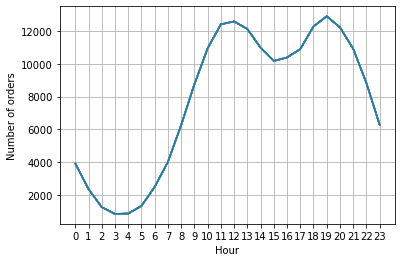

In [103]:
hours = [hour for hour , df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
all_data.groupby('Hour').count()


### Question 4: What products are most often sold together?

In [109]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x :','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Techno\AppData\Local\Temp/ipykernel_8228/1112722164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x :','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [118]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))
for key , value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [119]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",D:\Data analysis\Pandas-Data-Science-Tasks-mas...,1,11.99,Austin (TX),11,59


### What product sold the most? Why do you think it sold the most?

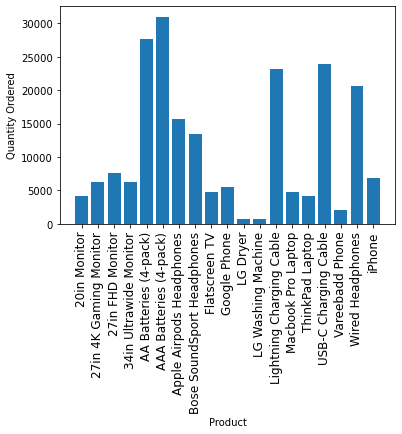

In [125]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product ,df in product_group ]
plt.bar(products,quantity_ordered )
plt.xticks(products, rotation = 'vertical', size = 12)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

C:\Users\Techno\AppData\Local\Temp/ipykernel_8228/1152252578.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=12)


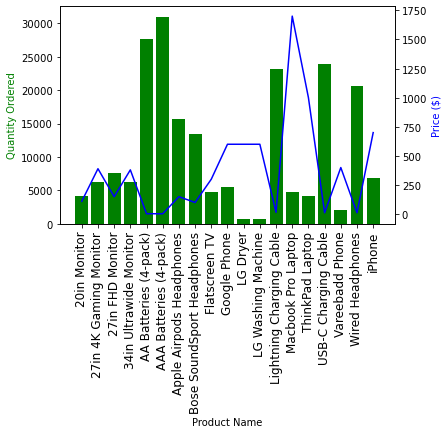

In [132]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=12)
plt.show()